#### Import libraries

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load data

In [142]:
#Load datasets
df_products = pd.read_json("https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/products.json")
df_categories = pd.read_json("https://raw.githubusercontent.com/anyoneai/e-commerce-open-data-set/master/categories.json")

#### Create count of hierarchical levels for each **category** and build an string showing the relationship  

In [143]:
pd.set_option('display.max_colwidth', None)
df_categories['nivel_jerarquico'] = df_categories['path'].apply(lambda x: len(x))
#df_categories
df_categories['relacion_niveles'] = df_categories['path'].apply(lambda x: ' > '.join(category['name'] for category in x if category['name'] is not None))
df_categories.head(3)

,id,name,path,subCategories,nivel_jerarquico,relacion_niveles
0,abcat0010000,Gift Ideas,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}]","[{'id': 'pcmcat140000050035', 'name': 'Capturing Photos & Videos'}, {'id': 'pcmcat140000050036', 'name': 'Listening to Digital Music'}, {'id': 'pcmcat140000050037', 'name': 'Computing Made Easy'}, {'id': 'pcmcat140000050039', 'name': 'Simple GPS Navigation'}, {'id': 'pcmcat140000050040', 'name': 'Playing Video Games'}, {'id': 'pcmcat140000050041', 'name': 'Watching HDTV'}, {'id': 'pcmcat140000050042', 'name': 'Enjoying Favorite Movies'}, {'id': 'abcat0012000', 'name': 'Him'}, {'id': 'abcat0011000', 'name': 'Her'}, {'id': 'abcat0013000', 'name': 'Teens'}, {'id': 'abcat0014000', 'name': 'Kids'}, {'id': 'pcmcat84000050001', 'name': 'Anniversaries'}, {'id': 'pcmcat84000050004', 'name': 'Baby Showers'}, {'id': 'pcmcat94300050028', 'name': 'Birthdays'}, {'id': 'pcmcat84000050002', 'name': 'Business Gifts'}, {'id': 'pcmcat84000050003', 'name': 'Graduations'}, {'id': 'pcmcat84000050000', 'name': 'Weddings'}, {'id': 'abcat0020004', 'name': 'Unique Gifts'}, {'id': 'pcmcat111900050004', 'name': 'Pink and Red Gifts'}, {'id': 'abcat0020006', 'name': 'Prepaid Cards'}, {'id': 'pcmcat231900050003', 'name': 'eGift Cards'}, {'id': 'pcmcat253700050028', 'name': 'QP Test Category'}, {'id': 'pcmcat312700050000', 'name': 'Our Favorite Gift Ideas'}, {'id': 'pcmcat327600050005', 'name': 'Easter Made Easy'}, {'id': 'pcmcat327600050006', 'name': 'Brunches Made Easy'}, {'id': 'pcmcat332300050004', 'name': 'Grads Gifting'}, {'id': 'pcmcat748300579354', 'name': 'Family Gift Ideas'}, {'id': 'pcmcat748301108075', 'name': 'Stocking Stuffers'}]",1,Gift Ideas
1,abcat0020001,Learning Toys,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}, {'id': 'abcat0014000', 'name': 'Kids'}, {'id': 'abcat0020000', 'name': 'Toys'}, {'id': 'abcat0020001', 'name': 'Learning Toys'}]",[],4,Gift Ideas > Kids > Toys > Learning Toys
2,abcat0020002,DVD Games,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}, {'id': 'abcat0014000', 'name': 'Kids'}, {'id': 'abcat0020000', 'name': 'Toys'}, {'id': 'abcat0020002', 'name': 'DVD Games'}]",[],4,Gift Ideas > Kids > Toys > DVD Games


#### Get categories with only one level in path, meaning they are the top level categories

In [144]:
# Filter the records with only one element in the 'path' column dictionary (meaning they don't have a higher level than themselves)
df_parents = df_categories[df_categories['path'].apply(lambda x: len(x) == 1)]
df_parents.sample(3)

,id,name,path,subCategories,nivel_jerarquico,relacion_niveles
3717,pcmcat362400050004,Laptop & Tablet Buying Guides,"[{'id': 'pcmcat362400050004', 'name': 'Laptop & Tablet Buying Guides'}]",[],1,Laptop & Tablet Buying Guides
2200,pcmcat230900050001,Best Buy For Business,"[{'id': 'pcmcat230900050001', 'name': 'Best Buy For Business'}]","[{'id': 'pcmcat154200050035', 'name': 'Small Business & Home Office Essentials'}, {'id': 'pcmcat356600050000', 'name': 'BBFB sub1'}, {'id': 'pcmcat356600050001', 'name': 'BBFB sub2'}, {'id': 'pcmcat356600050002', 'name': 'BBFB sub3'}]",1,Best Buy For Business
3473,pcmcat332000050000,Wearable Technology,"[{'id': 'pcmcat332000050000', 'name': 'Wearable Technology'}]","[{'id': 'pcmcat210000050008', 'name': 'Activity Trackers & Pedometers'}, {'id': 'pcmcat273800050002', 'name': 'Action Camcorders'}, {'id': 'abcat0204000', 'name': 'Headphones'}, {'id': 'pcmcat359400050017', 'name': 'Pet Tracking Devices'}, {'id': 'pcmcat321000050003', 'name': 'Smartwatches & Accessories'}, {'id': 'abcat0301006', 'name': 'Fitness & GPS Watches'}, {'id': 'pcmcat330100050000', 'name': 'Smart Sports Equipment'}, {'id': 'pcmcat748301221690', 'name': 'Smart Tracker Tags'}, {'id': 'pcmcat378200050018', 'name': 'Virtual Reality Headsets'}, {'id': 'pcmcat748300489081', 'name': 'Apple Watch'}, {'id': 'pcmcat356400050001', 'name': 'Health and Fitness Event'}]",1,Wearable Technology


**Products dataframe**

In [145]:
print('El número máximo de categorías por producto es:', df_products['category'].apply(lambda x: len(x)).max())

El número máximo de categorías por producto es: 7


#### Select these categories as the ones to be used for the hierarchical multi-label classification model

In [146]:
# Lista de IDs identificados como posibles padres
ids_filtrados = ['abcat0900000', 'abcat0100000', 'abcat0500000', 'abcat0800000', 'abcat0200000', 'abcat0700000',
                 'abcat0400000', 'abcat0600000', 'pcmcat332000050000', 'pcmcat242800050021', 'pcmcat252700050006',
                 'abcat0207000', 'abcat0300000', 'pcmcat311300050017']

In [147]:
df_filtrado = df_padres[df_padres['id'].isin(ids_filtrados)]
df_filtrado.shape

(14, 6)

In [148]:
df_filtrado.sample(1)

,id,name,path,subCategories,nivel_jerarquico,relacion_niveles
2336,pcmcat242800050021,"Health, Fitness & Beauty","[{'id': 'pcmcat242800050021', 'name': 'Health, Fitness & Beauty'}]","[{'id': 'pcmcat243800050004', 'name': 'Fitness & Exercise'}, {'id': 'pcmcat326900050000', 'name': 'Health'}, {'id': 'pcmcat326500050010', 'name': 'Health'}, {'id': 'abcat0915000', 'name': 'Personal Care & Beauty'}, {'id': 'pcmcat159400050012', 'name': 'Strength & Weight Training'}, {'id': 'pcmcat159400050013', 'name': 'Yoga, Pilates & Core Training'}, {'id': 'pcmcat208400050005', 'name': 'Portable Fitness Electronics'}, {'id': 'pcmcat246900050017', 'name': 'Portable Fitness fake'}, {'id': 'pcmcat246900050018', 'name': 'Personal Care fake'}, {'id': 'pcmcat159400050014', 'name': 'Fitness Accessories'}, {'id': 'pcmcat352500050007', 'name': 'Health & Fitness Accessories'}, {'id': 'pcmcat210000050008', 'name': 'Activity Trackers & Pedometers'}, {'id': 'pcmcat325200050005', 'name': 'Assistive Technology'}, {'id': 'pcmcat243800050005', 'name': 'Exercise Equipment'}, {'id': 'abcat0301006', 'name': 'Fitness & GPS Watches'}, {'id': 'pcmcat333300050027', 'name': 'Health Monitoring & Testing'}, {'id': 'pcmcat330100050000', 'name': 'Smart Sports Equipment'}, {'id': 'pcmcat273800050017', 'name': 'Sports & Outdoor Recreation'}, {'id': 'pcmcat230600050006', 'name': 'Sports Fan Shop'}]",1,"Health, Fitness & Beauty"


#### Now, let's get create a dataframe of products with all categories of each level 

Note that the maximum level of hierarchy is 7

In [149]:
def get_hierarchy_level(category):
    levels = []
    for cat in category:
        levels.append(cat['name'])
    return levels

hierarchical_levels = pd.DataFrame(df_products['category'].apply(get_hierarchy_level).tolist(),
                                     columns=['level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7'])

df_products_w_levels = pd.concat([df_products, hierarchical_levels], axis=1)
df_products_w_levels.sample(3)[['sku','name','category','level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'level_6', 'level_7']]

,sku,name,category,level_1,level_2,level_3,level_4,level_5,level_6,level_7
46295,9082600,Incipio - DualPro Hard Shell Case for Motorola Moto X (2nd Generation) Cell Phones - Cyan,"[{'id': 'abcat0800000', 'name': 'Cell Phones'}, {'id': 'abcat0811002', 'name': 'Cell Phone Accessories'}, {'id': 'abcat0811006', 'name': 'Cell Phone Cases & Clips'}]",Cell Phones,Cell Phone Accessories,Cell Phone Cases & Clips,None,None,None,None
5218,2017086,Diva Girls: Divas on Ice - PRE-OWNED - Nintendo DS,"[{'id': 'abcat0700000', 'name': 'Video Games'}, {'id': 'pcmcat232900050017', 'name': 'Pre-Owned Games'}]",Video Games,Pre-Owned Games,None,None,None,None,None
34214,6012005,Lenovo - IdeaCentre Desktop - 12GB Memory - 1TB Hard Drive - Black,"[{'id': 'abcat0500000', 'name': 'Computers & Tablets'}, {'id': 'abcat0501000', 'name': 'Desktop & All-in-One Computers'}, {'id': 'pcmcat143400050013', 'name': 'All Desktops'}]",Computers & Tablets,Desktop & All-in-One Computers,All Desktops,None,None,None,None


Also create a new column with the ID of the first category (Parent category) of each product

In [150]:
def get_id_of_categoryLevel_1(category):
    return category[0]['id']

# Apply the function to the 'category' column and create a new column 'level_1_id'
df_products_w_levels['level_1_id'] = df_products_w_levels['category'].apply(get_id_of_categoryLevel_1)
df_products_w_levels.sample(5)[['name','category','level_1', 'level_1_id']]

,name,category,level_1,level_1_id
40868,Metra - Wiring Harness for Most Chrysler and Dodge Vehicles - Multicolored,"[{'id': 'abcat0300000', 'name': 'Car Electronics & GPS'}, {'id': 'pcmcat165900050023', 'name': 'Car Installation Parts & Accessories'}, {'id': 'pcmcat331600050007', 'name': 'Car Audio Installation Parts'}, {'id': 'pcmcat165900050037', 'name': 'Speaker & Subwoofer Installation Parts'}, {'id': 'pcmcat165900050041', 'name': 'Speaker Harnesses'}]",Car Electronics & GPS,abcat0300000
2924,Turbo: Super Stunt Squad - PRE-OWNED - Nintendo Wii,"[{'id': 'abcat0700000', 'name': 'Video Games'}, {'id': 'pcmcat232900050017', 'name': 'Pre-Owned Games'}]",Video Games,abcat0700000
40260,Rachael Ray - Cucina Oven-To-Table 5-Quart Oval Sautéuse - Pumpkin Orange,"[{'id': 'abcat0900000', 'name': 'Appliances'}, {'id': 'abcat0912000', 'name': 'Small Kitchen Appliances'}, {'id': 'pcmcat748301695371', 'name': 'Cookware, Bakeware & Cutlery'}, {'id': 'pcmcat748301695443', 'name': 'Bakeware'}]",Appliances,abcat0900000
6307,Tosa - Cylinder Bluetooth Speaker - Red,"[{'id': 'abcat0200000', 'name': 'Audio'}, {'id': 'pcmcat310200050004', 'name': 'Bluetooth & Wireless Speakers'}]",Audio,abcat0200000
19472,Nintendo - amiibo Figure (Super Smash Bros. Greninja),"[{'id': 'abcat0700000', 'name': 'Video Games'}, {'id': 'pcmcat306400050032', 'name': 'Toys to Life'}, {'id': 'pcmcat385200050004', 'name': 'Amiibo'}]",Video Games,abcat0700000


#### **Histrogram of parent categories**

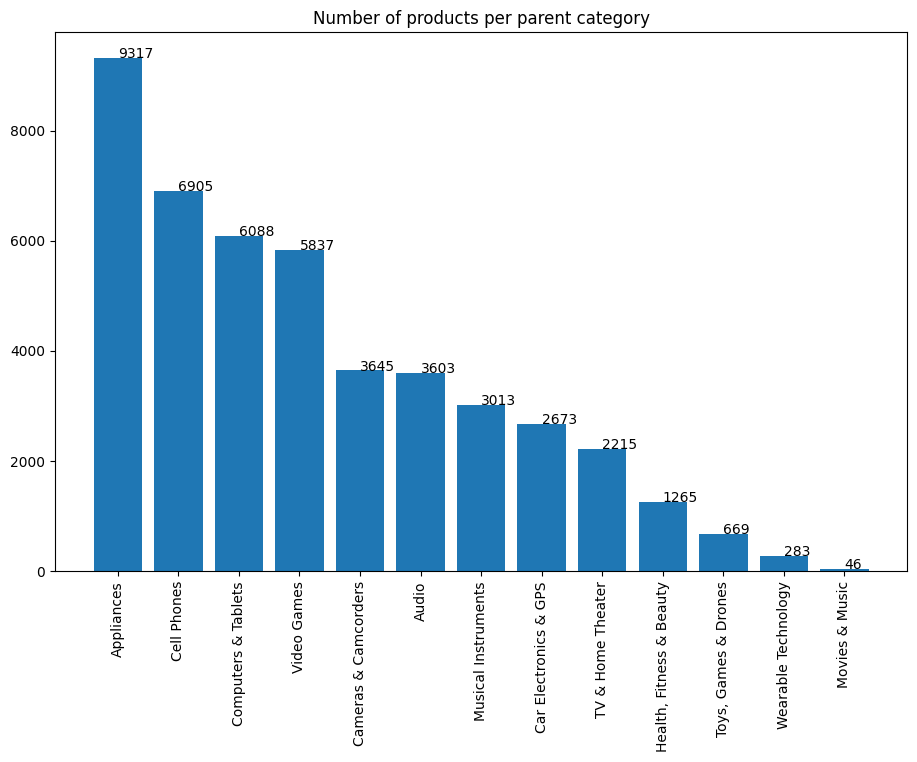

In [151]:
conteo_por_categoria = df_productos_con_niveles.groupby(['level_1_id', 'level_1']).size().reset_index(name='count')

# Filtrar los registros que coinciden con los IDs en la lista
parents_count = conteo_por_categoria[conteo_por_categoria['level_1_id'].isin(ids_filtrados)].sort_values(by='count', ascending=False)

# plot a bar plot of parents_count use show specific value of each bar
plt.figure(figsize=(11, 7))
plt.bar(parents_count['level_1'], parents_count['count'])
plt.title('Number of products per parent category')
plt.xticks(rotation=90)
for index, value in enumerate(parents_count['count']):
    plt.text(index, value, str(value))
plt.show()
